In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve, roc_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import  RandomizedSearchCV

In [56]:
def my_roc_auc(clf, X_test, y_test):
    fpr, tpr, _ = roc_curve(y_score=clf.predict_proba(X_test)[:,1], y_true=y_test)
#create ROC curve
    plt.plot (fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    return roc_auc_score(y_true=y_test, y_score=clf.predict_proba(X_test)[:,1])

In [47]:
X = pd.read_csv('X.csv', index_col='user_id')
y = pd.read_csv('y.csv', index_col='user_id')

In [48]:
# Разделим данные на тренировочные и тестовые 4 к 1:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

C:\Users\79922\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\79922\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\79922\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\79922\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataC

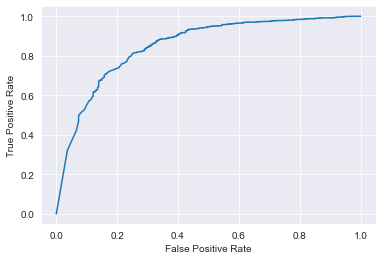

0.8505941479155765

In [57]:
log_reg = LogisticRegression(random_state=0, solver='liblinear',class_weight='balanced')
parameters = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

log_reg_grid = GridSearchCV(log_reg, parameters, cv=5, scoring='f1')
log_reg_grid.fit(X_train, y_train)

my_roc_auc(clf=log_reg_grid.best_estimator_, X_test=X_test, y_test=y_test)

C:\Users\79922\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


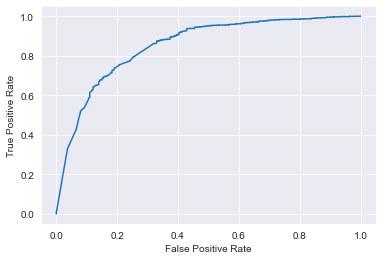

0.8523885836385837

In [59]:
#RandomForest


parametrs = {'max_depth': range(1, 12, 2), 'n_estimators': range(10, 50, 10), 'min_samples_split': range(2, 9, 2), 'min_samples_leaf': range(1, 7), 'random_state': [0]}
forest = RandomForestClassifier()
forest_grid = GridSearchCV(forest, param_grid=parametrs, cv=3, n_jobs=-1)
forest_grid.fit(X_train, y_train)

my_roc_auc(clf=forest_grid.best_estimator_, X_test=X_test, y_test=y_test)

C:\Users\79922\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


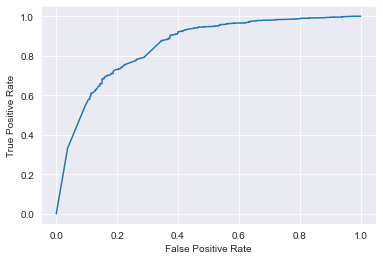

0.8487768184196756

In [81]:
#GradientBoosting


parametrs = {'n_estimators': range(50, 500),
             'max_depth': range(2, 15),
             'criterion': ['friedman_mse', 'squared_error'],
             'learning_rate': np.arange(0.01, 0.04, 0.001),
             'min_samples_leaf': range(2, 20),
             'min_samples_split': range(2, 20),
             'random_state': [0]}
grad_boost = GradientBoostingClassifier()
grad_boost_grid = RandomizedSearchCV(grad_boost, param_distributions=parametrs, cv=3, n_jobs=-1)
grad_boost_grid.fit(X_train, y_train)

my_roc_auc(clf=grad_boost_grid.best_estimator_, X_test=X_test, y_test=y_test)

In [80]:
grad_boost_grid.best_params_

{'random_state': 0,
 'n_estimators': 190,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_depth': 2,
 'learning_rate': 0.014999999999999996,
 'criterion': 'squared_error'}

In [1]:
jopaq

NameError: name 'jopaq' is not defined